In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

# THIS PART WORKS WITH NO RADIATIVE TRANSFER (NO RT)

In [2]:
전data300_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 no RT/dwarf_dm_7e8_0300.txt")
dx300_noRT = 전data300_noRT[:,4]
dy300_noRT = 전data300_noRT[:,5]
dz300_noRT = 전data300_noRT[:,6]
r300_noRT = np.sqrt(dx300_noRT**2 + dy300_noRT**2 + dz300_noRT**2) # max: 9751.934166119612, closest to 9760
rad_array300_noRT = np.arange(10, 9760, 10, dtype=np.int64)
density_profile300_noRT = np.zeros(np.size(rad_array300_noRT))
i = 0
for radius_value in rad_array300_noRT:
    particles = np.where((r300_noRT > radius_value) & (r300_noRT < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile300_noRT[i] = how_many_particles / shell_volume
    i += 1
densityprof300_noRT = density_profile300_noRT / density_profile300_noRT[1]

In [3]:
mass_profile300_noRT = np.zeros(np.size(rad_array300_noRT))
h = 0
for radius_value in rad_array300_noRT:
    particles = np.where((r300_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile300_noRT[h] = how_many_particles * 500
    h += 1

## generating 2 NFW profiles with 2 different masses.
## the one called "halo7" will be the main one running.

In [4]:
# the mass equals to the mass of the last data point that Jeon collected.

halo7 = NFW(mass_profile300_noRT[np.size(mass_profile300_noRT) - 1])
r_s7 = halo7.r_s()
c_vir7 = halo7.c_vir()
print('r_s =', r_s7)
print('c_vir =', c_vir7)

radius7 = np.arange(0.01, 9.76, 0.01) #unit: kpc

r_s = 0.783043692793846
c_vir = 18.789798776290766


In [5]:
# the mass is made up by Dr Besla to estimate m_vir

halo7_1 = NFW(1.72e8) # NFW using M_200 / 0.87
r_s7_1 = halo7_1.r_s()
c_vir7_1 = halo7_1.c_vir()
print('r_s =', r_s7_1)
print('c_vir =', c_vir7_1)

radius7_1 = np.arange(0.01, 9.76, 0.01) #unit: kpc

r_s = 0.7651872152192165
c_vir = 18.86957954996097


## plotting the density & mass profiles at this redshift (unnormalized)

In [6]:
'''this is to set in stone some of the variables we'll use later'''

dx300_noRT = 전data300_noRT[:,4] / 1000 # converting pc to kpc
dy300_noRT = 전data300_noRT[:,5] / 1000 # converting pc to kpc
dz300_noRT = 전data300_noRT[:,6] / 1000 # converting pc to kpc
r300_noRT = np.sqrt(dx300_noRT**2 + dy300_noRT**2 + dz300_noRT**2) # max closest to 9.76 kpc
rad_array300_noRT = np.arange(0.01, 9.76, 0.01)

density_profile300_noRT = np.zeros(np.size(rad_array300_noRT))
i = 0
for radius_value in rad_array300_noRT:
    particles = np.where((r300_noRT > radius_value) & (r300_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile300_noRT[i] = how_many_particles / shell_volume
    i += 1

# this finds density that best corresponds to the critical density
rho_crit = 140
deviation_from_rho_crit = abs(density_profile300_noRT * 500 - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
radius_at_rho_crit = rad_array300_noRT[index][0]

# this finds density that best corresponds to 200 times the critical density
density200 = rho_crit * 200
deviate = abs(density_profile300_noRT * 500 - density200)
ind = np.where(deviate == min(deviate))
rad200 = rad_array300_noRT[ind][0]
mass_at_200_times_rho_crit = mass_profile300_noRT[ind][0] 

# this defines the NFW profile
density_profile7 = halo7.rho(radius7)
density_profile7_1 = halo7_1.rho(radius7_1)

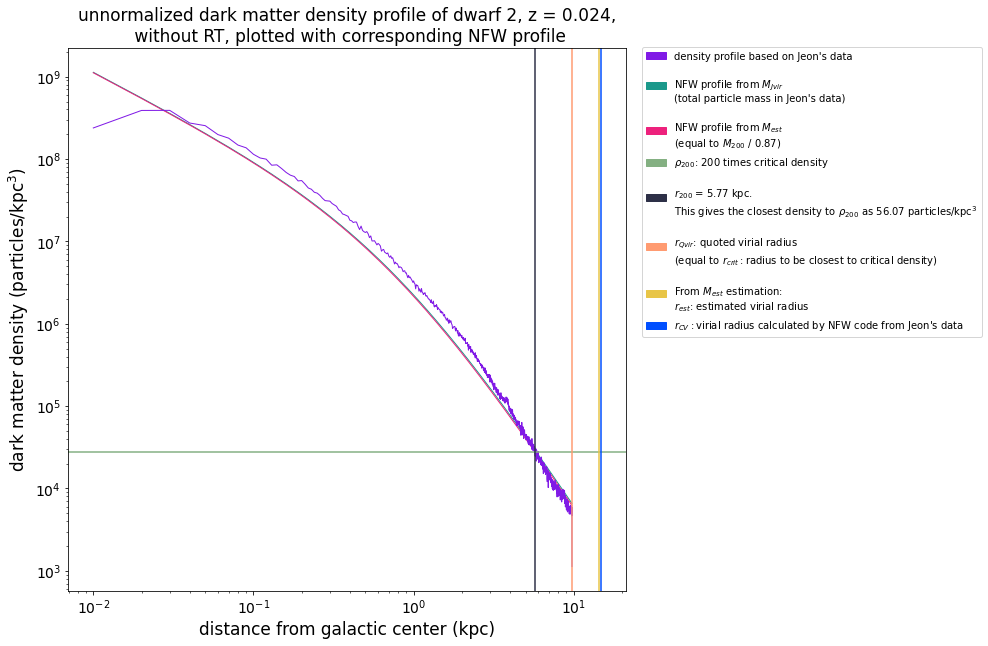

In [7]:
'''PLOTTING THE DENSITY PROFILE'''

fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius7, density_profile7, color='#1B998B', linewidth=1)
plt.plot(radius7_1, density_profile7_1, color='#ED217C', linewidth=1)
plt.plot(radius7, density_profile300_noRT * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axhline(200 * rho_crit, color='#84B082')
plt.axvline(rad200, color='#2D3047')
plt.axvline(9.752054e+03 * 0.001, color='#FF9B71')
plt.axvline(halo7_1.r_vir(), color='#E8C547')
plt.axvline(halo7.r_vir(), color='#004FFF')
notec = mpatches.Patch(color=(0.5, 0.1, 0.9, 1), label="density profile based on Jeon's data")
notea = mpatches.Patch(color='#1B998B', label="\nNFW profile from $M_{Jvir}$\n(total particle mass in Jeon's data)")
noteb = mpatches.Patch(color='#ED217C', label="\nNFW profile from $M_{est}$\n(equal to $M_{200}$ / 0.87)")
note0 = mpatches.Patch(color='#84B082', label="$ρ_{200}$: 200 times critical density")
note1 = mpatches.Patch(color='#2D3047', label="\n$r_{200}$ = " + str(round(rad200, 2)) + " kpc.\nThis gives the closest density to $ρ_{200}$ as " + \
str(round(density_profile300_noRT[ind][0], 2)) + " particles/kpc$^3$")
note2 = mpatches.Patch(color='#FF9B71', label="\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")
note3 = mpatches.Patch(color='#E8C547', label="\nFrom $M_{est}$ estimation:\n$r_{est}$: estimated virial radius")
note4 = mpatches.Patch(color='#004FFF', label="$r_{CV}:$virial radius calculated by NFW code from Jeon's data")
plt.legend(handles=[notec, notea, noteb, note0, note1, note2, \
                    note3, note4], bbox_to_anchor=(1.02, 1.01), loc='upper left')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.title('unnormalized dark matter density profile of dwarf 2, z = 0.024,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.show()

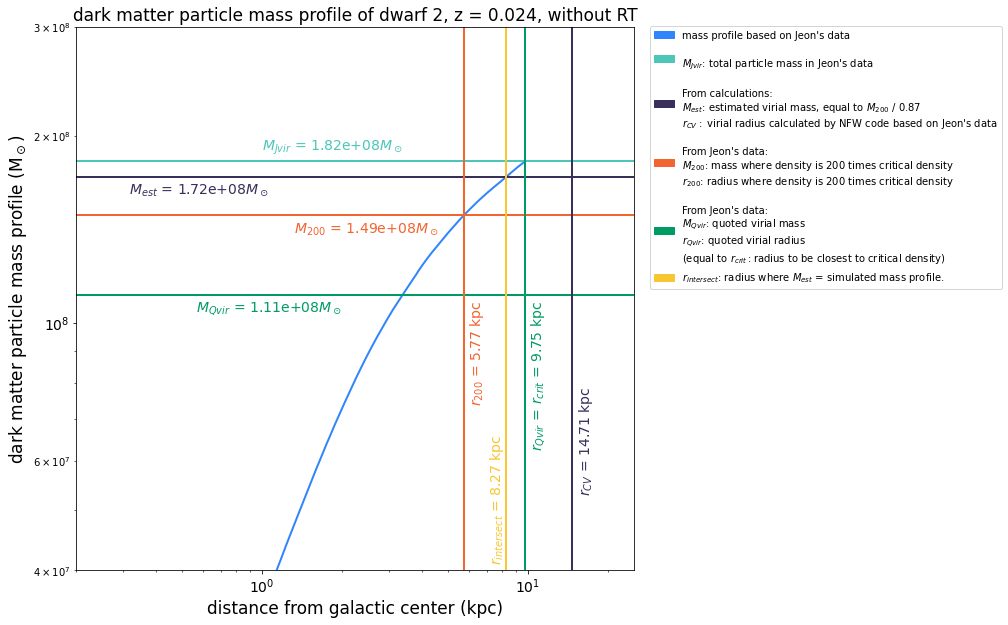

In [8]:
'''PLOTTING THE MASS PROFILE'''

plt.figure(figsize=(10,10))

# the main plot from Jeon's data
plt.plot(radius7, mass_profile300_noRT, color='#3185FC', linewidth=2)

# ADDITIONAL NOTES: find where M_est = simulated mass profile
difference_from_massprof_noRT = abs(mass_profile300_noRT - mass_at_200_times_rho_crit / 0.87)
location = np.where(difference_from_massprof_noRT == min(difference_from_massprof_noRT))
intersecting_radius_noRT = rad_array300_noRT[location][0]

# all the horizontal lines
plt.axhline(mass_profile300_noRT[np.size(mass_profile300_noRT) - 1], color='#4BC6B9', linewidth=2)
plt.axhline(1.107706e+08, color='#009B62', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit / 0.87, color='#392F5A', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit, color='#F26430', linewidth=2)

# all the vertical lines
plt.axvline(9.752054e+03 * 0.001, color='#009B62', linewidth=2) #r_vir quoted by Jeon
plt.axvline(intersecting_radius_noRT, color='#F8C630', linewidth=2) #radius where M_est meets the simulated mass profile
plt.axvline(rad200, color='#F26430', linewidth=2) #r200
plt.axvline(halo7.r_vir(), color='#392F5A', linewidth=2) #r_vir from calculations

# separate legends
legend1 = mpatches.Patch(color='#3185FC', label="mass profile based on Jeon's data")

legend2 = mpatches.Patch(color='#4BC6B9', label="\n$M_{Jvir}$: total particle mass in Jeon's data")
legend3 = mpatches.Patch(color='#392F5A', label="\nFrom calculations:\n$M_{est}$: estimated virial mass, equal to $M_{200}$ / 0.87\n$r_{CV}:$ virial radius calculated by NFW code based on Jeon's data")
legend4 = mpatches.Patch(color='#F26430', \
                         label="\nFrom Jeon's data:\n$M_{200}$: mass where density is 200 times critical density\n$r_{200}$: radius where density is 200 times critical density")
legend5 = mpatches.Patch(color='#009B62', \
                         label="\nFrom Jeon's data:\n$M_{Qvir}$: quoted virial mass\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")
legend6 = mpatches.Patch(color='#F8C630', label="$r_{intersect}$: radius where $M_{est}$ = simulated mass profile.")

plt.legend(handles=[legend1, legend2, legend3, legend4, legend5, legend6], bbox_to_anchor=(1.02, 1.01), loc='upper left')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**-0.7, 10**1.4)
plt.ylim(4e7, 3e8)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 2, z = 0.024, without RT', loc='center', fontsize=17)

plt.text(10**0, 10**8.278, '''$M_{Jvir}$ = ''' + str(format(mass_profile300_noRT[np.size(mass_profile300_noRT) - 1], '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#4BC6B9')
plt.text(10**-0.5, 10**8.21, '''$M_{est}$ = ''' + str(format(mass_at_200_times_rho_crit / 0.87, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#392F5A')
plt.text(10**0.12, 10**8.146, '''$M_{200}$ = ''' + str(format(mass_at_200_times_rho_crit, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#F26430')
plt.text(10**-0.25, 10**8.02, '''$M_{Qvir}$ = ''' + str(format(1.107706e+08, '.2e')) +  '''$M_\odot$''', \
         fontsize=14, color='#009B62') #y = 10**8.24

plt.text(10**0.774, 10**7.876, '''$r_{200}$ = ''' + str(round(rad200, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#F26430')
plt.text(10**0.849, 10**7.62, '''$r_{intersect}$ = ''' + str(round(intersecting_radius_noRT, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#F8C630') 
plt.text(10**1.005, 10**7.804, '''$r_{Qvir}$ = $r_{crit}$ = ''' + str(round(9.752054e+03 * 0.001, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#009B62')
plt.text(10**1.185, 10**7.73, '''$r_{CV}$ = ''' + str(round(halo7.r_vir(), 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#392F5A')

plt.show()

# THIS PART WORKS WITH RADIATIVE TRANSFER (RT)

In [9]:
전data300 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 RT/dwarf_dm_7e8_rt_0300.txt")
dx300 = 전data300[:,4]
dy300 = 전data300[:,5]
dz300 = 전data300[:,6]
r300 = np.sqrt(dx300**2 + dy300**2 + dz300**2) # max closest to 9730 pc
rad_array300 = np.arange(10, 9730, 10, dtype=np.int64)
density_profile300 = np.zeros(np.size(rad_array300))
i = 0
for radius_value in rad_array300:
    particles = np.where((r300 > radius_value) & (r300 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile300[i] = how_many_particles / shell_volume
    i += 1
densityprof300 = density_profile300 / density_profile300[1]

In [10]:
mass_profile300 = np.zeros(np.size(rad_array300))
h = 0
for radius_value in rad_array300:
    particles = np.where((r300 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile300[h] = how_many_particles * 500
    h += 1

## generating 2 NFW profiles with 2 different masses.
## the one called "halo6" will be the main one running.

In [11]:
# the mass equals to the mass of the last data point that Jeon collected.

halo8 = NFW(mass_profile300[np.size(mass_profile300) - 1])
r_s8 = halo8.r_s()
c_vir8 = halo8.c_vir()
print('r_s =', r_s8)
print('c_vir =', c_vir8)

radius8 = np.arange(0.01, 9.73, 0.01) #unit: kpc

r_s = 0.7807028765735335
c_vir = 18.800133984732817


In [12]:
# the mass is made up by Dr Besla to estimate m_vir

halo8_1 = NFW(1.68e8) # NFW using M_200 / 0.87
r_s8_1 = halo8_1.r_s()
c_vir8_1 = halo8_1.c_vir()
print('r_s =', r_s8_1)
print('c_vir =', c_vir8_1)

radius8_1 = np.arange(0.01, 9.83, 0.01) #unit: kpc

r_s = 0.7578702851442629
c_vir = 18.90290974611889


## plotting the density & mass profiles at this redshift (unnormalized)

In [13]:
'''this is to set in stone some of the variables we'll use later'''

dx300 = 전data300[:,4] / 1000 # converting data in pc to kpc
dy300 = 전data300[:,5] / 1000 # converting data in pc to kpc
dz300 = 전data300[:,6] / 1000 # converting data in pc to kpc
r300 = np.sqrt(dx300**2 + dy300**2 + dz300**2) # max closest to 9.73 kpc
rad_array300 = np.arange(0.01, 9.73, 0.01) # bin size: 0.01 kpc
density_profile300 = np.zeros(np.size(rad_array300))
i = 0
for radius_value in rad_array300:
    particles = np.where((r300 > radius_value) & (r300 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile300[i] = how_many_particles / shell_volume
    i += 1
    
# this finds density that best corresponds to the critical density
rho_crit = 140
deviation2 = abs(density_profile300 * 500 - rho_crit)
quelque_part = np.where(deviation2 == min(deviation2))
rad_rho_crit = rad_array300[quelque_part][0]

# this finds density that best corresponds to 200 times the critical density
density200 = rho_crit * 200
deviate2 = abs(density_profile300 * 500 - density200)
quelque_part2 = np.where(deviate2 == min(deviate2))
radius200 = rad_array300[quelque_part2][0]
mass_200rhocrit = mass_profile300[quelque_part2][0] 

# this defines the NFW profile
density_profile8 = halo8.rho(radius8)
density_profile8_1 = halo8_1.rho(radius8_1)

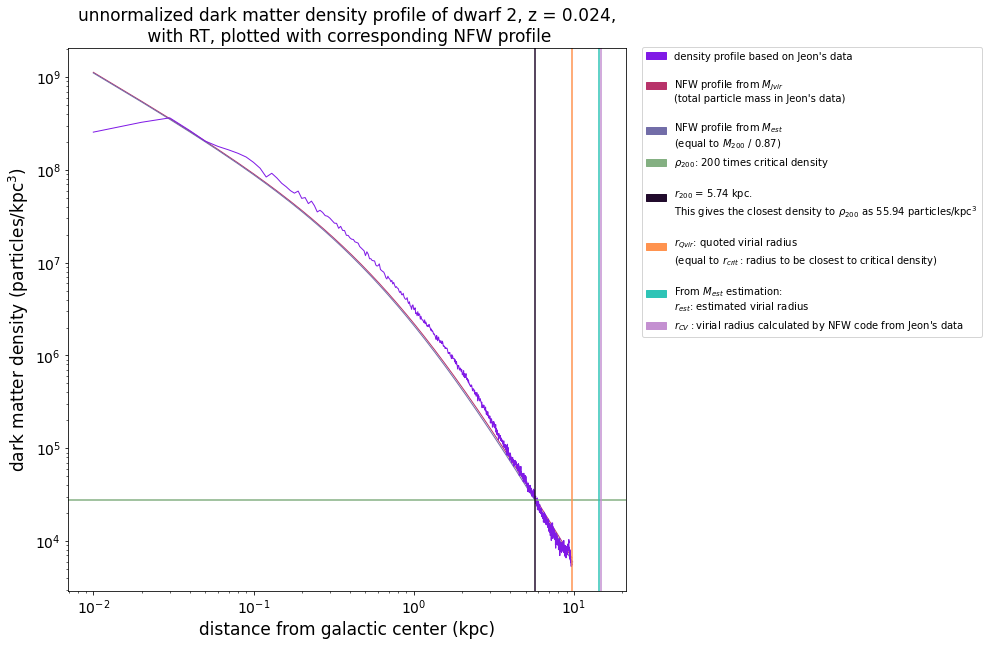

In [14]:
'''PLOTTING THE DENSITY PROFILE'''

plt.figure(figsize=(10, 10))

plt.plot(radius8, density_profile8, color='#B8336A', linewidth=1)
plt.plot(radius8_1, density_profile8_1, color='#726DA8', linewidth=1)
plt.plot(radius8, density_profile300 * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axhline(200 * rho_crit, color='#84B082')
plt.axvline(radius200, color='#210B2C') 
plt.axvline(9.729628e+03 * 0.001, color='#FF934F')
plt.axvline(halo8_1.r_vir(), color='#2EC4B6')
plt.axvline(halo8.r_vir(), color='#C490D1')
notec = mpatches.Patch(color=(0.5, 0.1, 0.9, 1), label="density profile based on Jeon's data")
notea = mpatches.Patch(color='#B8336A', label="\nNFW profile from $M_{Jvir}$\n(total particle mass in Jeon's data)")
noteb = mpatches.Patch(color='#726DA8', label="\nNFW profile from $M_{est}$\n(equal to $M_{200}$ / 0.87)")
note0 = mpatches.Patch(color='#84B082', label="$ρ_{200}$: 200 times critical density")
note1 = mpatches.Patch(color='#210B2C', label="\n$r_{200}$ = " + str(radius200) + " kpc.\nThis gives the closest density to $ρ_{200}$ as " + \
str(round(density_profile300[quelque_part2][0], 2)) + " particles/kpc$^3$")
note2 = mpatches.Patch(color='#FF934F', label="\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")
note3 = mpatches.Patch(color='#2EC4B6', label="\nFrom $M_{est}$ estimation:\n$r_{est}$: estimated virial radius")
note4 = mpatches.Patch(color='#C490D1', label="$r_{CV}:$virial radius calculated by NFW code from Jeon's data")

plt.legend(handles=[notec, notea, noteb, note0, \
                   note1, note2, note3, note4], bbox_to_anchor=(1.02, 1.01), loc='upper left')
        
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 2, z = 0.024,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

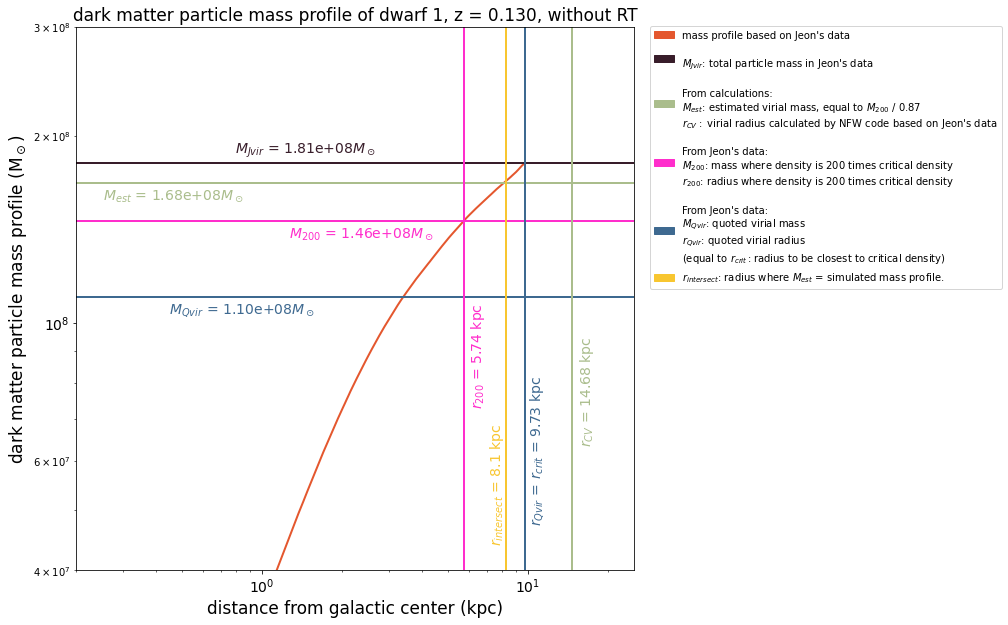

In [15]:
'''PLOTTING THE MASS PROFILE'''

plt.figure(figsize=(10,10))

# the main plot from Jeon's data
plt.plot(radius8, mass_profile300, color='#E4572E', linewidth=2)

# ADDITIONAL NOTES: find where M_est = simulated mass profile
difference_from_massprof = abs(mass_profile300 - mass_200rhocrit / 0.87)
locate = np.where(difference_from_massprof == min(difference_from_massprof))
intersecting_radius = rad_array300[locate][0]

# all the horizontal lines
plt.axhline(mass_profile300[np.size(mass_profile300) - 1], color='#381D2A', linewidth=2)
plt.axhline(1.099948e+08, color='#3E6990', linewidth=2)
plt.axhline(mass_200rhocrit / 0.87, color='#AABD8C', linewidth=2)
plt.axhline(mass_200rhocrit, color='#FF2ECC', linewidth=2)

# all the vertical lines
plt.axvline(9.729628e+03 * 0.001, color='#3E6990', linewidth=2) #r_vir quoted by Jeon
plt.axvline(radius200, color='#FF2ECC', linewidth=2) #r200
plt.axvline(halo8.r_vir(), color='#AABD8C', linewidth=2) #r_vir from calculations
plt.axvline(intersecting_radius_noRT, color='#F8C630', linewidth=2) #radius where M_est meets the simulated mass profile

# separate legends
legend1 = mpatches.Patch(color='#E4572E', label="mass profile based on Jeon's data")

legend2 = mpatches.Patch(color='#381D2A', label="\n$M_{Jvir}$: total particle mass in Jeon's data")
legend3 = mpatches.Patch(color='#AABD8C', label="\nFrom calculations:\n$M_{est}$: estimated virial mass, equal to $M_{200}$ / 0.87\n$r_{CV}:$ virial radius calculated by NFW code based on Jeon's data")
legend4 = mpatches.Patch(color='#FF2ECC', \
                         label="\nFrom Jeon's data:\n$M_{200}$: mass where density is 200 times critical density\n$r_{200}$: radius where density is 200 times critical density")
legend5 = mpatches.Patch(color='#3E6990', \
                         label="\nFrom Jeon's data:\n$M_{Qvir}$: quoted virial mass\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")
legend6 = mpatches.Patch(color='#F8C630', label="$r_{intersect}$: radius where $M_{est}$ = simulated mass profile.")

plt.legend(handles=[legend1, legend2, legend3, legend4, legend5, legend6], bbox_to_anchor=(1.02, 1.01), loc='upper left')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**-0.7, 10**1.4)
plt.ylim(4e7, 3e8)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)

plt.text(10**-0.1, 10**8.273, '''$M_{Jvir}$ = ''' + str(format(mass_profile300[np.size(mass_profile300) - 1], '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#381D2A') 
plt.text(10**-0.6, 10**8.199, '''$M_{est}$ = ''' + str(format(mass_200rhocrit / 0.87, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#AABD8C') 
plt.text(10**0.1, 10**8.139, '''$M_{200}$ = ''' + str(format(mass_200rhocrit, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#FF2ECC') 
plt.text(10**-0.35, 10**8.016, '''$M_{Qvir}$ = ''' + str(format(1.099948e+08, '.2e')) +  '''$M_\odot$''', \
         fontsize=14, color='#3E6990')

plt.text(10**0.78, 10**7.87, '''$r_{200}$ = ''' + str(round(radius200, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#FF2ECC')
plt.text(10**0.85, 10**7.65, '''$r_{intersect}$ = ''' + str(round(intersecting_radius, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#F8C630') 
plt.text(10**1.002, 10**7.683, '''$r_{Qvir}$ = $r_{crit}$ = ''' + str(round(9.729628e+03 * 0.001, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#3E6990')
plt.text(10**1.19, 10**7.81, '''$r_{CV}$ = ''' + str(round(halo8.r_vir(), 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#AABD8C')

plt.show()